<a href="https://colab.research.google.com/github/judeavery/CS4372Assignment1/blob/main/notebooks/main_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# make plots look nice
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

# load dataset

url = "https://raw.githubusercontent.com/judeavery/CS4372Assignment1/refs/heads/main/data/day.csv"

df = pd.read_csv(url)
df.head()


# preview the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# quick check of shape
print("\nDataset shape:", df.shape)



First 5 rows of the dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Dataset shape: (731, 16)


In [14]:


# check data types and null counts
print("Dataset Info:")
df.info()


# summary statistics
print("Summary Statistics:")
display(df.describe())

# display column names
print("Column Names:")
print(df.columns.tolist())





Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Summary Statistics:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Column Names:
['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [17]:

# check for missing values
print("=== Missing Values in Each Column ===")
print(df.isnull().sum())



# check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



#  validate categorical variable ranges
expected_ranges = {
    'season': [1, 2, 3, 4],
    'yr': [0, 1],
    'mnth': list(range(1, 13)),
    'holiday': [0, 1],
    'weekday': list(range(0, 7)),
    'workingday': [0, 1],
    'weathersit': [1, 2, 3, 4]
}



print("\n=== Categorical Variable Validation ===")
for col, valid_values in expected_ranges.items():
    unique_values = sorted(df[col].unique())
    print(f"{col} unique values: {unique_values}")
    if not set(unique_values).issubset(set(valid_values)):
        print(f"⚠️ WARNING: {col} contains unexpected values!")



# more inspection of contin. columms
continuous_cols = ['temp', 'atemp', 'hum', 'windspeed']

print("\n=== Continuous Variable Ranges ===")
for col in continuous_cols:
    min_val, max_val = df[col].min(), df[col].max()
    print(f"{col}: min = {min_val:.3f}, max = {max_val:.3f}")
    if min_val < 0 or max_val > 1:
        print(f"⚠️ WARNING: {col} has values outside [0, 1] range!")



=== Missing Values in Each Column ===
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Number of duplicate rows: 0

=== Categorical Variable Validation ===
season unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
yr unique values: [np.int64(0), np.int64(1)]
mnth unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]
holiday unique values: [np.int64(0), np.int64(1)]
weekday unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
workingday unique values: [np.int64(0), np.int64(1)]
weathersit unique values: [np.int64(1), np.int64(2), np.int64(3)]

=== Continuous Variable Ranges ===
tem

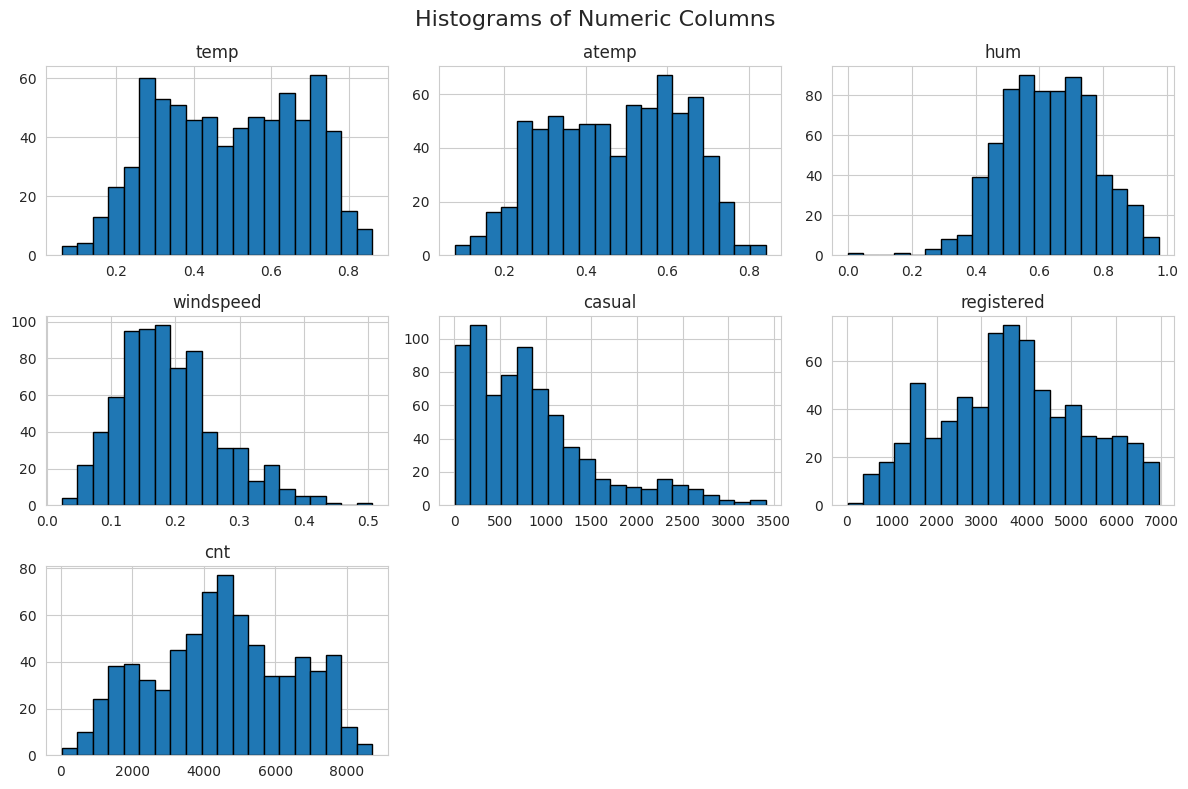

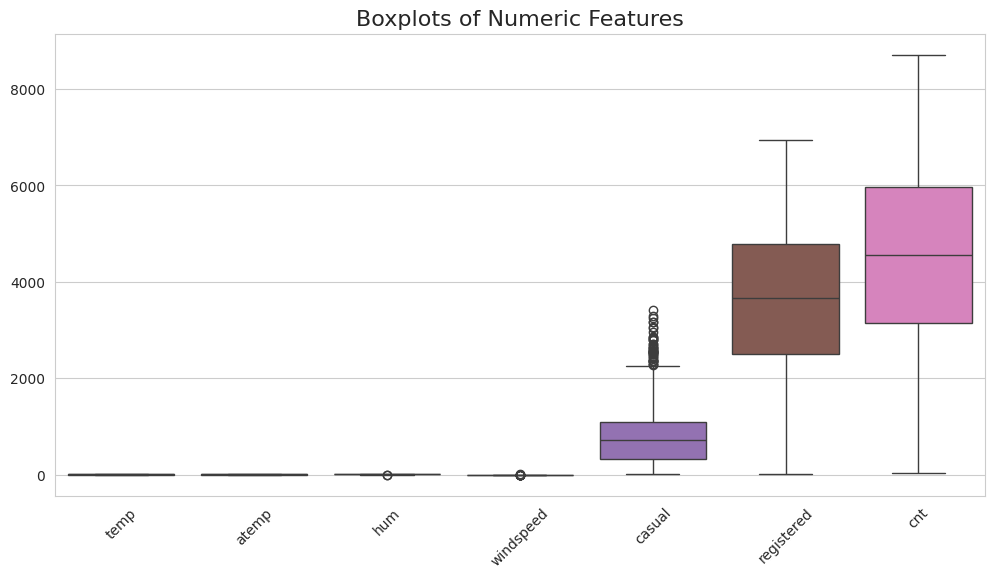

/tmp/ipython-input-4252869421.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='cnt', data=df, ci=None, palette='viridis')
/tmp/ipython-input-4252869421.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='cnt', data=df, ci=None, palette='viridis')


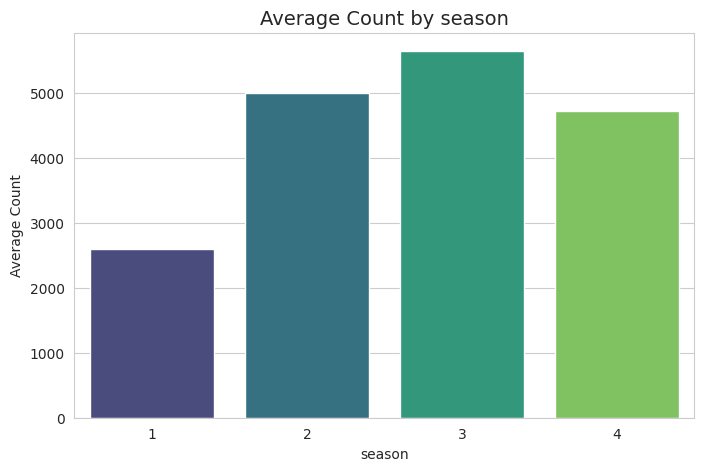

/tmp/ipython-input-4252869421.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='cnt', data=df, ci=None, palette='viridis')
/tmp/ipython-input-4252869421.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='cnt', data=df, ci=None, palette='viridis')


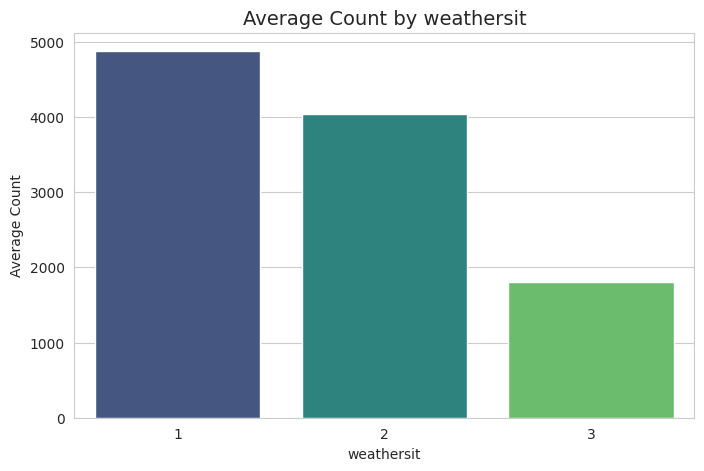

/tmp/ipython-input-4252869421.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='cnt', data=df, ci=None, palette='viridis')
/tmp/ipython-input-4252869421.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='cnt', data=df, ci=None, palette='viridis')


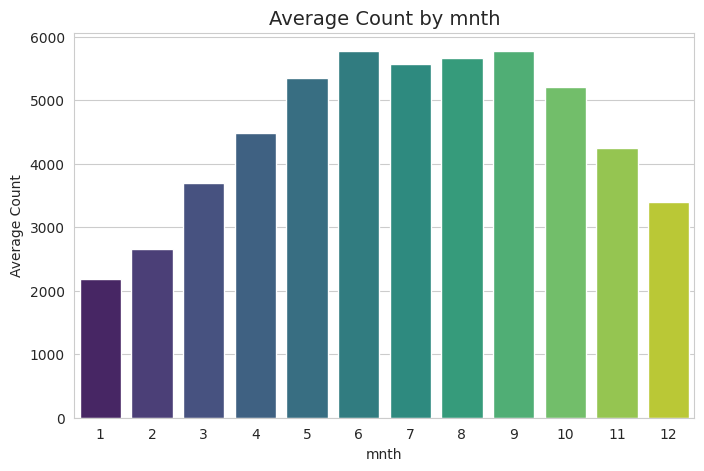

/tmp/ipython-input-4252869421.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='cnt', data=df, ci=None, palette='viridis')
/tmp/ipython-input-4252869421.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='cnt', data=df, ci=None, palette='viridis')


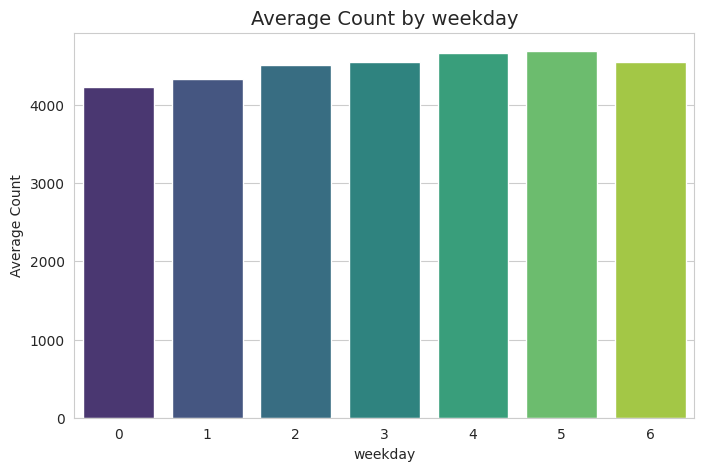

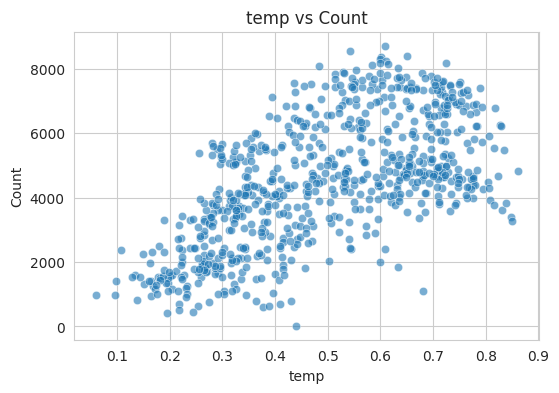

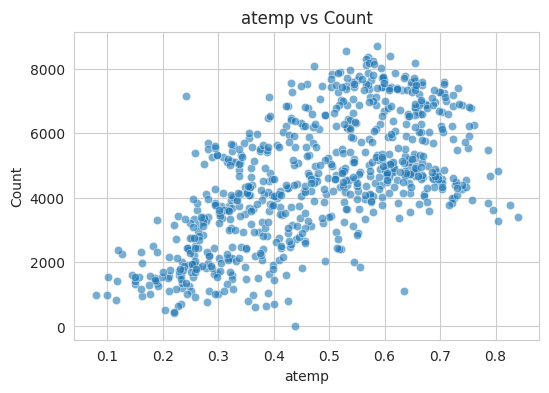

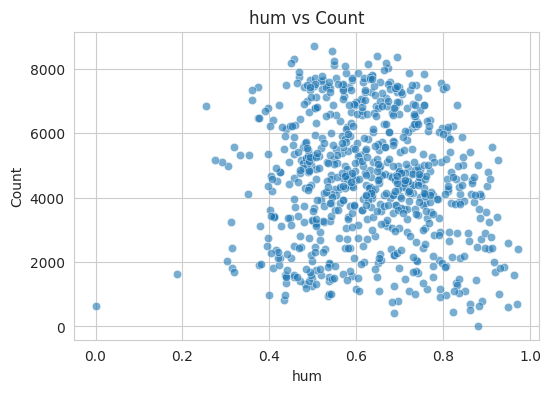

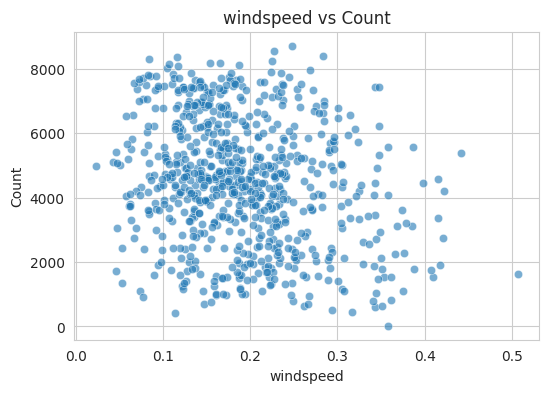

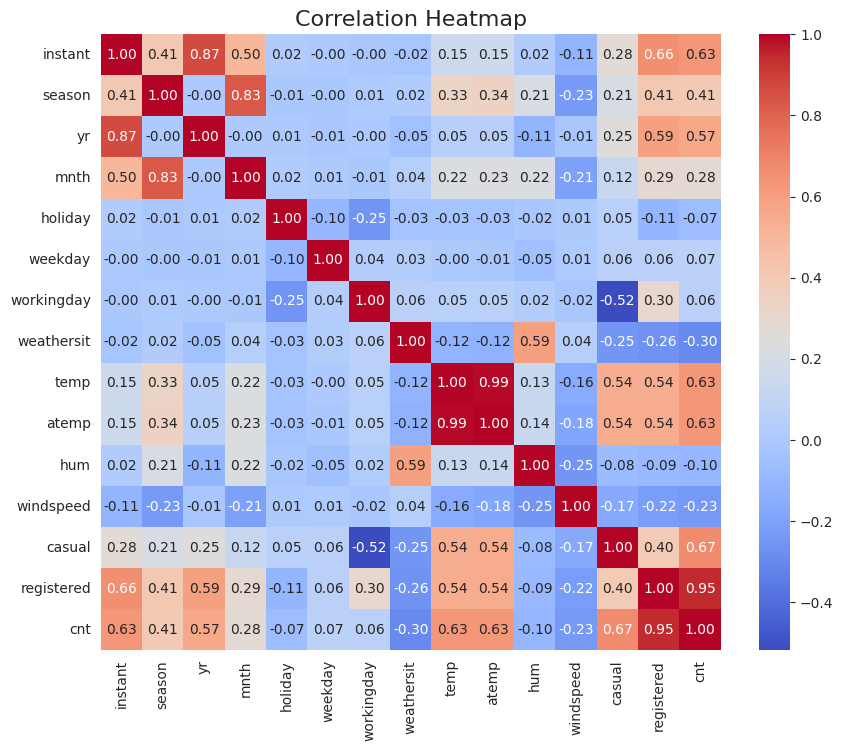

In [19]:
#  basic visual exploration


#  histograms
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df[numeric_cols].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

#  boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of Numeric Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()

#  target vs categorical variables
categorical_cols = ['season', 'weathersit', 'mnth', 'weekday']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='cnt', data=df, ci=None, palette='viridis')
    plt.title(f"Average Count by {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Average Count')
    plt.show()

#  scatterplots for continuous vs target
continuous_cols = ['temp', 'atemp', 'hum', 'windspeed']
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='cnt', data=df, alpha=0.6)
    plt.title(f"{col} vs Count")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#  correlation heatmap (numeric only)
plt.figure(figsize=(10, 8))

# select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# generate heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()



In [22]:
# drop unnecessary columns
df = df.drop(['instant', 'dteday'], axis=1)

# verify they are removed
print("Remaining columns:", df.columns.tolist())




KeyError: "['instant', 'dteday'] not found in axis"

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


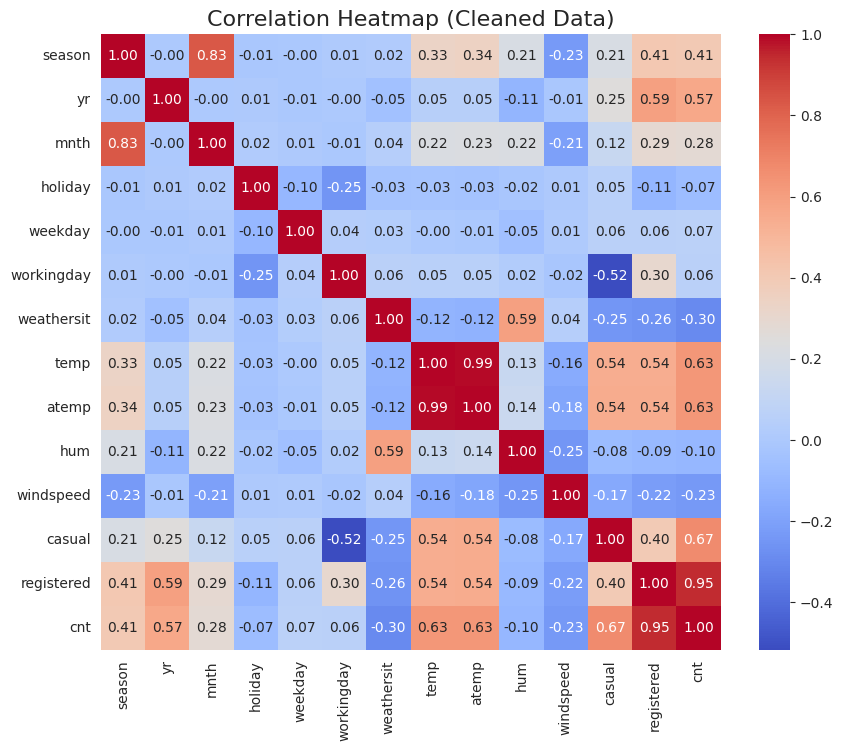

In [24]:
# generate heatmap on cleaned dataframe
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Cleaned Data)", fontsize=16)
plt.show()


In [25]:
# drop columns not needed for modeling
df = df.drop(['casual', 'registered'], axis=1)

print("Remaining columns:", df.columns.tolist())


Remaining columns: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [26]:
# list of categorical columns to encode
categorical_cols = ['season', 'mnth', 'weekday', 'weathersit']

# perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# check the new shape
print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)

# preview the first few rows
df_encoded.head()


Shape before encoding: (731, 12)
Shape after encoding: (731, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [28]:
df = df_encoded


In [29]:
print(df.columns.tolist())


['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3']


In [30]:
continuous_cols = ['temp', 'atemp', 'hum', 'windspeed']
from sklearn.preprocessing import StandardScaler

in
scaler = StandardScaler()

# fit and transform only the continuous variables
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])


print(df[continuous_cols].describe().T)


           count          mean       std       min       25%       50%  \
temp       731.0 -4.179663e-16  1.000685 -2.384871 -0.865385  0.016117   
atemp      731.0  2.916044e-17  1.000685 -2.427296 -0.838267  0.076015   
hum        731.0 -9.914550e-16  1.000685 -4.411486 -0.758047 -0.008621   
windspeed  731.0 -2.138432e-16  1.000685 -2.170506 -0.717107 -0.122813   

                75%       max  
temp       0.874845  2.002355  
atemp      0.824368  2.250800  
hum        0.718845  2.421148  
windspeed  0.551725  4.092936  


In [31]:
df.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,-0.826662,-0.679946,1.250171,-0.387892,985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,-0.721095,-0.740652,0.479113,0.749602,801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,-1.634657,-1.749767,-1.339274,0.746632,1349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,-1.614780,-1.610270,-0.263182,-0.389829,1562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,-1.467414,-1.504971,-1.341494,-0.046307,1600,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [32]:
# separate predictors and target
X = df.drop('cnt', axis=1)  # features (all columns except cnt)
y = df['cnt']               # target (cnt column)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (731, 29)
y shape: (731,)


In [33]:
from sklearn.model_selection import train_test_split

# split train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# check the shape of each split
print("Training features shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (584, 29)
Training target shape: (584,)
Testing features shape: (147, 29)
Testing target shape: (147,)


In [34]:
# verify counts
print("Total rows:", len(df))
print("Train + Test rows:", len(X_train) + len(X_test))


X_train.head()


Total rows: 731
Train + Test rows: 731


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
682,1,0,1,-0.831221,-0.928028,0.246066,1.957003,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
250,0,0,1,0.757292,0.497434,2.189752,0.029205,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
336,0,0,0,-1.072664,-1.005528,-0.105227,-1.222843,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
260,0,0,0,0.066230,0.099374,0.471476,-0.154990,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
543,1,0,1,1.104903,1.022035,-1.882182,1.049635,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [35]:
from sklearn.linear_model import SGDRegressor

# initialize the model
sgd_model = SGDRegressor(random_state=42)

# fit the model on training data
sgd_model.fit(X_train, y_train)


SGDRegressor(random_state=42)

In [36]:
# predict on the test set
y_pred_sgd = sgd_model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_sgd)
r2 = r2_score(y_test, y_pred_sgd)

print("SGDRegressor Performance:")
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 4))


SGDRegressor Performance:
Mean Squared Error (MSE): 646328.54
R² Score: 0.8388


In [38]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['SGDRegressor'],
    'MSE': [round(mse, 2)],
    'R2 Score': [round(r2, 4)]
})

results


,Model,MSE,R2 Score
0,SGDRegressor,646328.54,0.8388


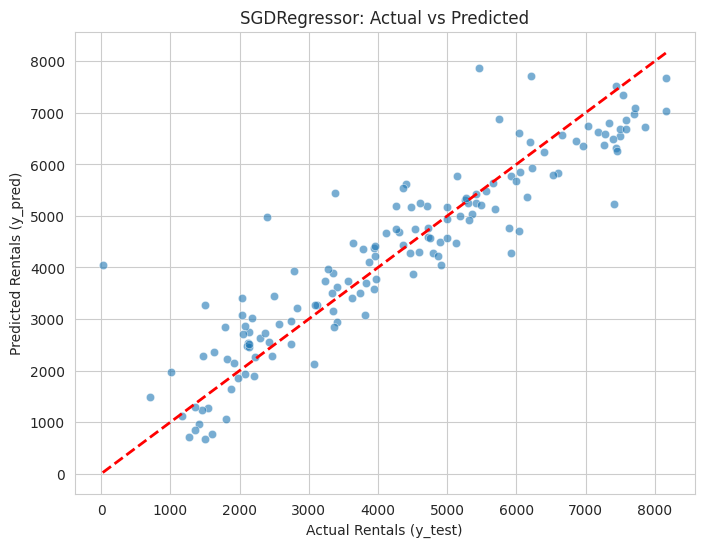

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_sgd, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel('Actual Rentals (y_test)')
plt.ylabel('Predicted Rentals (y_pred)')
plt.title('SGDRegressor: Actual vs Predicted')
plt.show()


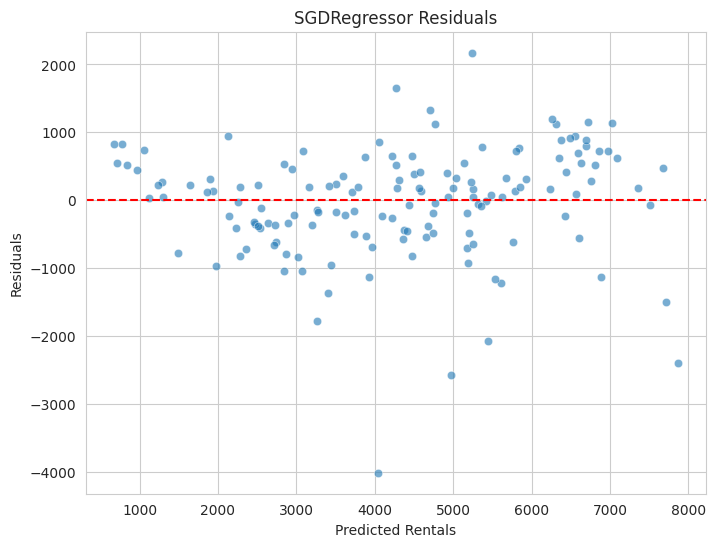

In [40]:
residuals = y_test - y_pred_sgd

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_sgd, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Rentals')
plt.ylabel('Residuals')
plt.title('SGDRegressor Residuals')
plt.show()


In [41]:
sgd_tuned = SGDRegressor(alpha=0.001, penalty='l2', max_iter=1000, random_state=42)
sgd_tuned.fit(X_train, y_train)


SGDRegressor(alpha=0.001, random_state=42)

In [44]:
# convert all boolean columns to integers (encountered an error)
X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int64' for col in X_test.select_dtypes('bool').columns})

# double-check that everything is now numeric
print(X_train.dtypes)



yr                int64
holiday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
season_2          int64
season_3          int64
season_4          int64
mnth_2            int64
mnth_3            int64
mnth_4            int64
mnth_5            int64
mnth_6            int64
mnth_7            int64
mnth_8            int64
mnth_9            int64
mnth_10           int64
mnth_11           int64
mnth_12           int64
weekday_1         int64
weekday_2         int64
weekday_3         int64
weekday_4         int64
weekday_5         int64
weekday_6         int64
weathersit_2      int64
weathersit_3      int64
dtype: object


In [45]:
import statsmodels.api as sm

# ddd constant for intercept
X_train_sm = sm.add_constant(X_train)

# fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()


ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     109.6
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          1.10e-205
Time:                        01:34:22   Log-Likelihood:                -4694.2
No. Observations:                 584   AIC:                             9446.
Df Residuals:                     555   BIC:                             9573.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2356.6572    179.881     13.101      0.000    2003.327    2709.987
yr            1981.8346     65.557     30.231      0.000    1853.064    2110.605
holiday       -206.1361    190.224     -1.084      0.279    -579.783     167.511
workingday     348.9057     74.045      4.712      0.000     203.462     494.349
temp           692.0812    267.814      2.584      0.010     166.028    1218.135
atemp          197.0627    248.051      0.794      0.427    -290.171     684.297
hum           -205.1990     46.090     -4.452      0.000    -295.731    -114.667
windspeed     -198.6683     35.828     -5.545      0.000    -269.043    -128.293
season_2       951.8582    216.703      4.392      0.000     526.200    1377.516
season_3       819.0717    248.508      3.296      0.001     330.941    1307.203
season_4      1654.2430    216.582      7.638      0.000    1228.822    2079.664
mnth_2          79.7762    156.002      0.511      0.609    -226.651     386.203
mnth_3         578.4282    194.203      2.978      0.003     196.965     959.891
mnth_4         290.1909    288.097      1.007      0.314    -275.703     856.085
mnth_5         540.8763    307.944      1.756      0.080     -64.002    1145.754
mnth_6         313.3629    322.232      0.972      0.331    -319.580     946.306
mnth_7        -274.8814    355.780     -0.773      0.440    -973.722     423.959
mnth_8         161.4787    345.222      0.468      0.640    -516.623     839.580
mnth_9         847.6801    303.164      2.796      0.005     252.190    1443.170
mnth_10        383.0937    276.343      1.386      0.166    -159.712     925.899
mnth_11       -218.1263    266.599     -0.818      0.414    -741.794     305.541
mnth_12       -194.5011    212.235     -0.916      0.360    -611.383     222.381
weekday_1      -58.9467     82.131     -0.718      0.473    -220.272     102.379
weekday_2      -33.8961     87.590     -0.387      0.699    -205.945     138.152
weekday_3       71.1877     90.018      0.791      0.429    -105.629     248.005
weekday_4       40.5542     85.272      0.476      0.635    -126.941     208.050
weekday_5      123.8705     90.097      1.375      0.170     -53.103     300.844
weekday_6      486.6773    115.928      4.198      0.000     258.967     714.388
weathersit_2  -508.4387     85.984     -5.913      0.000    -677.333    -339.545
weathersit_3 -1826.3721    212.646     -8.589      0.000   -2244.061   -1408.683
==============================================================================
Omnibus:                       87.257   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.368
Skew:                          -0.769   Prob(JB):                     1.40e-48
Kurtosis:                       5.587   Cond. No.                     7.24e+15
===============

In [46]:
# add constant to X_test
X_test_sm = sm.add_constant(X_test)

# make predictions
y_pred_ols = ols_model.predict(X_test_sm)

# evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print("OLS Performance:")
print("Mean Squared Error (MSE):", round(mse_ols, 2))
print("R² Score:", round(r2_ols, 4))


OLS Performance:
Mean Squared Error (MSE): 634351.36
R² Score: 0.8418


In [47]:
# create dataframe for comparison
ols_results = pd.DataFrame({
    'Model': ['OLS Regression'],
    'MSE': [round(mse_ols, 2)],
    'R2 Score': [round(r2_ols, 4)]
})

# combine with SGD results
comparison = pd.concat([results, ols_results], ignore_index=True)
comparison


,Model,MSE,R2 Score
0,SGDRegressor,646328.54,0.8388
1,OLS Regression,634351.36,0.8418


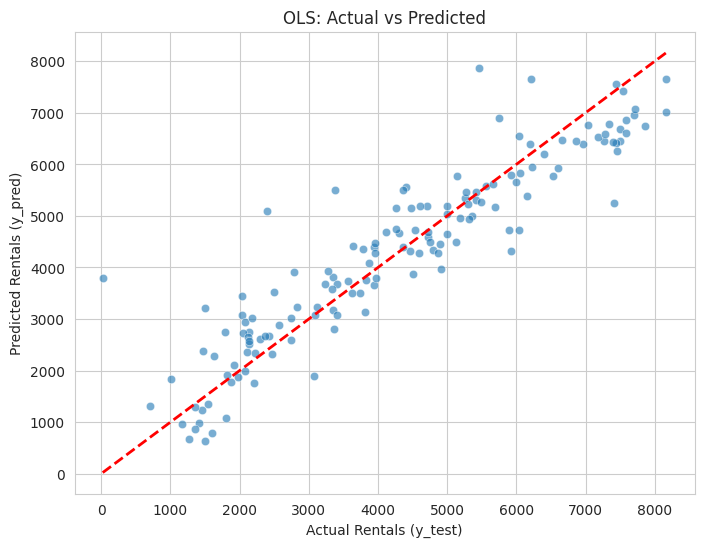

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ols, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # perfect prediction line
plt.xlabel('Actual Rentals (y_test)')
plt.ylabel('Predicted Rentals (y_pred)')
plt.title('OLS: Actual vs Predicted')
plt.show()


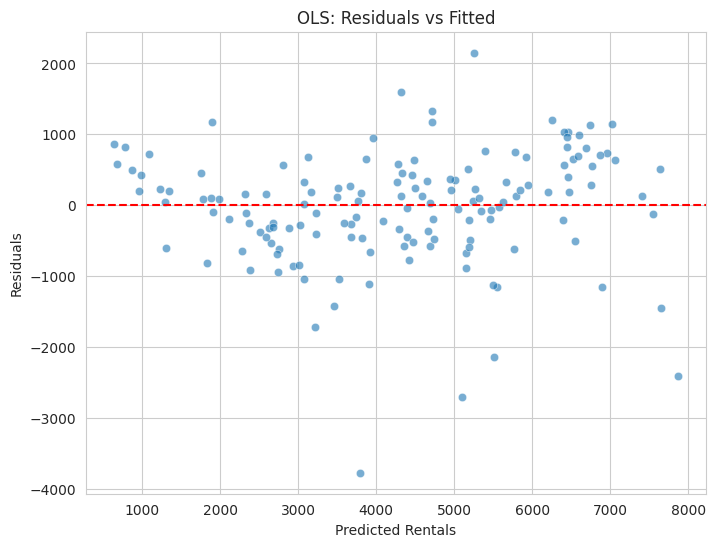

In [48]:
residuals = y_test - y_pred_ols

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_ols, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Rentals')
plt.ylabel('Residuals')
plt.title('OLS: Residuals vs Fitted')
plt.show()


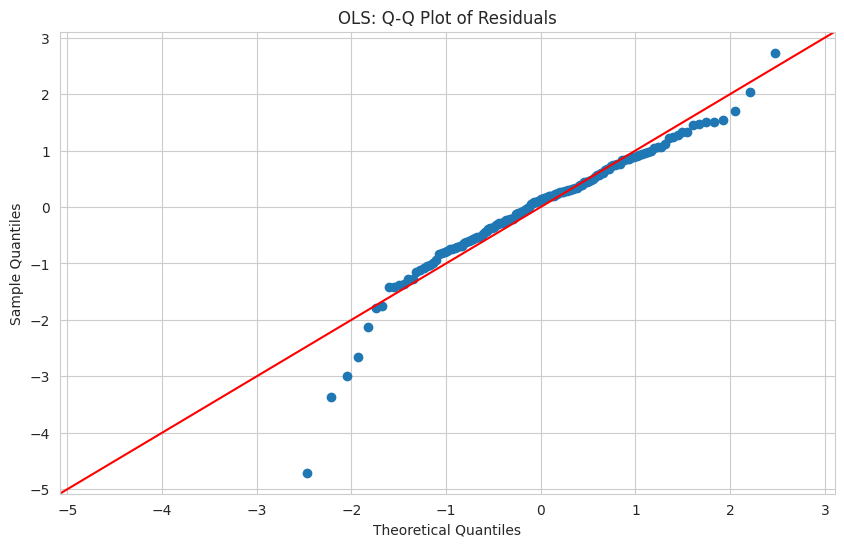

In [49]:
sm.qqplot(residuals, line='45', fit=True)
plt.title('OLS: Q-Q Plot of Residuals')
plt.show()


In [50]:
# create a summary table comparing both models
comparison = pd.DataFrame({
    'Model': ['SGDRegressor', 'OLS Regression'],
    'MSE': [round(mse, 2), round(mse_ols, 2)],
    'R² Score': [round(r2, 4), round(r2_ols, 4)]
})

comparison


,Model,MSE,R² Score
0,SGDRegressor,646328.54,0.8388
1,OLS Regression,634351.36,0.8418


/tmp/ipython-input-2242232852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=comparison, palette='Blues_d')


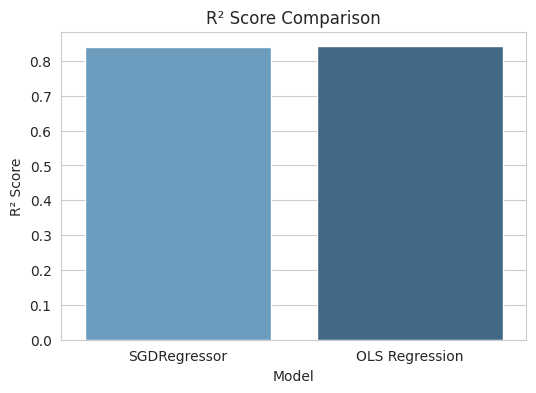

In [51]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='R² Score', data=comparison, palette='Blues_d')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.show()


/tmp/ipython-input-1978610214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=comparison, palette='Reds_d')


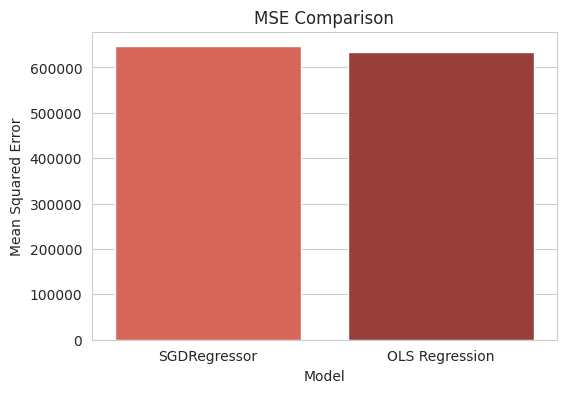

In [52]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='MSE', data=comparison, palette='Reds_d')
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.show()
